In [ ]:
# -*- coding: utf-8 -*-
"""
Script to generate a 3-d plot of the kernel density estimate for a set of 2-d  
points imported from a file.
"""
import pickle, matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
dim=2

def multivariate_gaussian(x, mu, sigma, normalize=False):
    x_mu = np.array(x-mu)
    sigma_inv = np.linalg.inv(sigma)
    power = -0.5*np.linalg.multi_dot([x_mu,sigma_inv,x_mu])

    k = len(x)
    sigma_det = np.linalg.det(sigma)
    norm = ((2*np.pi)**k*sigma_det)**0.5
    if normalize:
        return(np.exp(power))
    else:
        return(np.exp(power)/norm)
    
def kernel_density_estimate(x, points):
    n = len(points)
    h = n**-0.2 # Bandwidth.
    kde = 0
    for point in points:
        kde += multivariate_gaussian(x,point,h*np.identity(dim),
                                    normalize=True)/(n*h)
    return(kde)

def simple_scatter(points):
    fig, axs = plt.subplots(1,figsize=(8,8))
    axs.scatter([point[0] for point in points],[point[1] for point in points],
                marker='o',s=8)
    plt.xlim((-6,6))
    plt.ylim((-3,30))

X,Y,zz,levels,xs,ys,zs = None,None,None,None,None,None,None

def plot_3d_I(points):
    global X,Y,zz,levels,xs,ys,zs

    xx = np.linspace(-6, 6, 50)
    yy = np.linspace(-3, 30, 100)
    zz = np.zeros((xx.size,yy.size))

    for i1,y in enumerate(yy):
        for i2,x in enumerate(xx):
             # Reverse order because of x-y vs row-column ordering for mesh.
             # Do [i1,i2] or use transpose.
            zz[i2,i1] = kernel_density_estimate(np.array([x,y]),
                                                points[len(points)-1])
        
    X, Y = np.meshgrid(xx, yy)
    
    zmax = 0.55
    levels = np.linspace(0, zmax, 1000)
    
    # Now get the HSMC simulation samples to scatter over target density.
    with open('4x192.data', 'rb') as filehandle:
        particles = pickle.load(filehandle)
    
    xs = [p[0] for p in particles]
    ys = [p[1] for p in particles]

    # Height should be just above density plot to make visualization clear.
    zs = [kernel_density_estimate(np.array([xs[i],ys[i]]),
                                                points[len(points)-1])
          for i in range(len(xs))]
    w = [6**2 for i in range(len(xs))]
    
def main():
    with open('smileyface2.data', 'rb') as filehandle:
        points = pickle.load(filehandle)
        
    points=[points[len(points)-1]] 
    points=[points[0]] # To use less data.

    plot_3d_I(points)
main()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


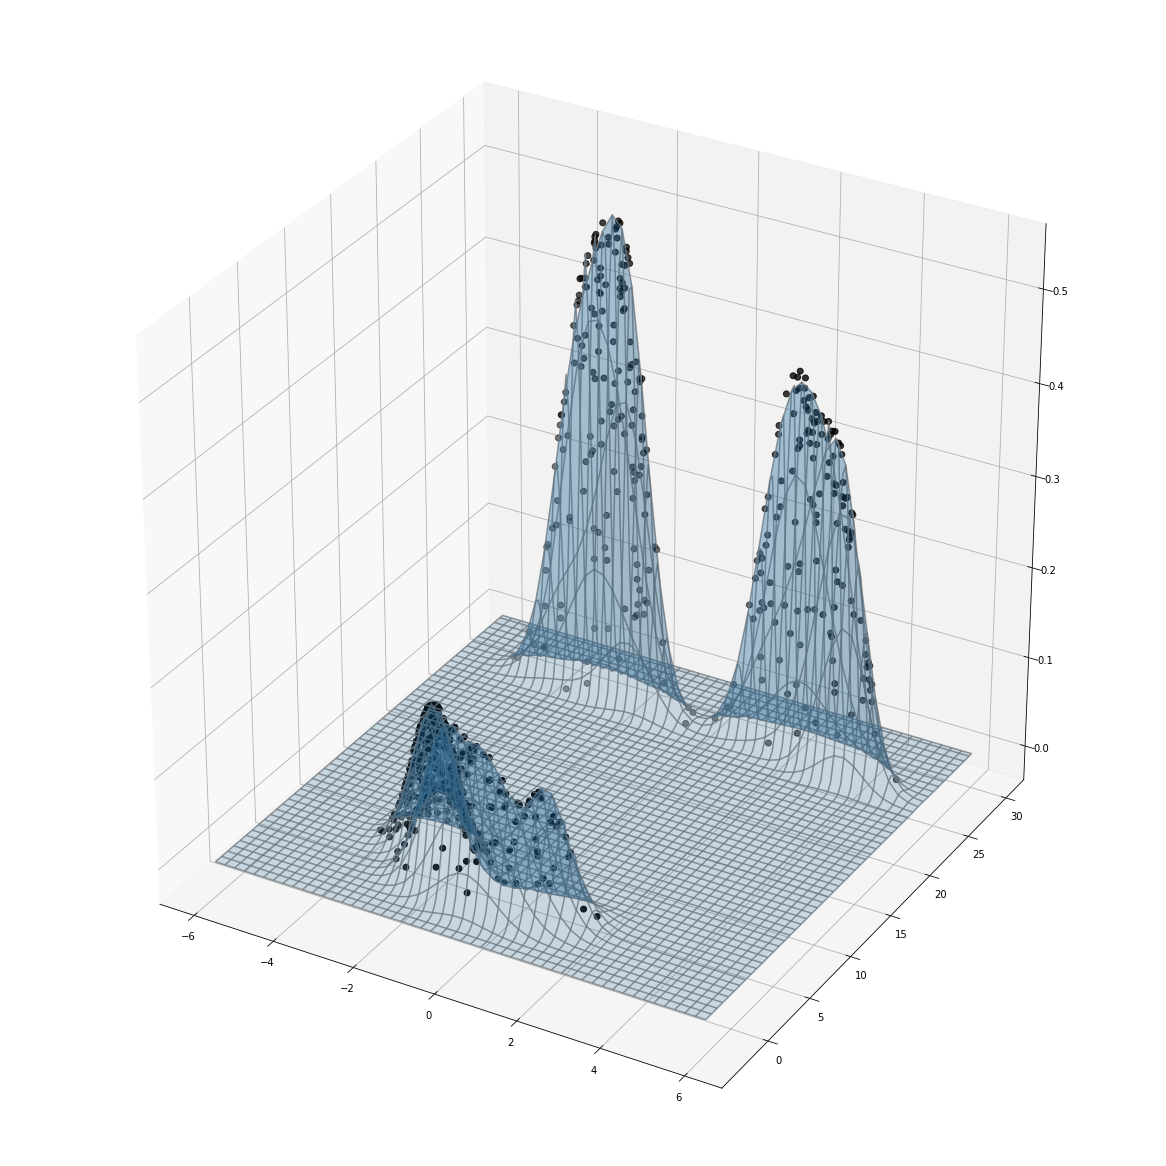

In [59]:
def plot_3d_II():
    fig = plt.figure(figsize=(16,16))
    ax = Axes3D(fig)

    ax.plot_wireframe(X, Y, zz.T, rstride=2, cstride=1, color='gray',alpha=0.8)
    #ax.contourf(X, Y, zz.T,
     #           zdir='z', levels=levels, alpha=0.1)
    ax.plot_surface(X, Y, zz.T, linewidth=0, alpha=0.2)
    w = [6**2 for i in range(len(xs))]
    ax.scatter(xs, ys,zs, c='k',s=w)
    plt.show()

plot_3d_II()